In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# !wget -q -O ../data/attn-maps.zip https://www.dropbox.com/sh/qlkesj8p5t6icwz/AADpY8ODZv14CgpmRWT4wzKwa?dl=1
# !unzip -q ../data/attn-maps.zip -d ../data/attn-maps/

mapname:  conversion of  failed


## Mex

Test subjects: (26-30)

In [2]:
activity_map = {1: 'Knee Rolling', 2: 'Bridging', 3: 'Pelvic tilt',4: 'The Clam',
                5: 'Repeated Extension in Lying',6: 'Prone punches',7: 'Superman'}

In [3]:
mex_window_attn = np.load('../data/attn-maps/mex_26_30_window.npy')
mex_session_attn = np.load('../data/attn-maps/mex_26_30_session.npy')
mex_labels = np.load('../data/attn-maps/mex_26_30_labels.npy')
mex_preds = np.load('../data/attn-maps/mex_26_30_preds.npy')
mex_data_scaled = np.load('../data/attn-maps/mex_26_30_data_std_scale.npy')
mex_data_non_scaled = np.load('../data/attn-maps/mex_26_30_data_no_scale.npy')

In [4]:
mex_session_attn.shape

(471, 1, 10)

In [9]:
mex_window_attn.shape

(471, 20, 200)

In [6]:
mex_data_non_scaled.shape

(471, 2000, 6)

Index(['thigh_x', 'thigh_y', 'thigh_z', 'wrist_x', 'wrist_y', 'wrist_z',
       'thigh_magnitude', 'wrist_magnitude'],
      dtype='object')


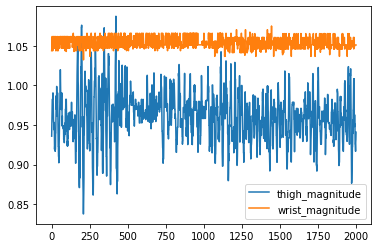

True Label: Bridging
Predicted: Bridging


In [7]:
data = pd.DataFrame(mex_data_non_scaled[111])
data.columns = ['thigh_x', 'thigh_y', 'thigh_z','wrist_x', 'wrist_y', 'wrist_z']
data['thigh_magnitude'] = np.sqrt(np.square(data['thigh_x']) + np.square(data['thigh_y']) + np.square(data['thigh_z']))
data['wrist_magnitude'] = np.sqrt(np.square(data['wrist_x']) + np.square(data['wrist_y']) + np.square(data['wrist_z']))
print(data.columns)
plt.plot(data[['thigh_magnitude', 'wrist_magnitude']])

# plt.plot(data.iloc[:, -1])
# plt.scatter(range(2000), data.iloc[:,2], c=cm.jet(np.abs(data.iloc[:,1])), edgecolor='none')
plt.legend(data.columns[-2:])
plt.show()
print(f'True Label: {activity_map[mex_labels[111]]}')
print(f'Predicted: {activity_map[mex_preds[111]+1]}')

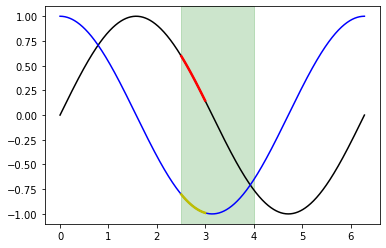

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 1000)

y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, 'k-', lw=1.5)
plt.plot(x, z, 'b-', lw=1.5)

plt.axvspan(2.5, 4, color='g', alpha=0.2)
# plt.axvspan(4, 6, color='g', alpha=0.7)
# plt.axvspan(0, 2.5, color='g', alpha=0.1)
# plt.axhspan(-.5, .5, color='k', alpha=0.1)

mask = (x > 2.5) & (x < 3.0)

plt.plot(x[mask], y[mask], 'r-', lw=2.5)
plt.plot(x[mask], z[mask], 'y-', lw=2.5)

plt.show()

In [11]:
def show_mex_attention(idx):
#     print(idx)
#     print(f'True Label: {activity_map[mex_labels[idx]]}')
#     print(f'Predicted: {activity_map[mex_preds[idx]+1]}')

    f,[ax_window, ax_heat]=plt.subplots(nrows=2,figsize=(10, 5.5),sharex=True, gridspec_kw={'height_ratios': [1., .5]})

    # fig, ax = plt.subplots(3,1, figsize = (10,14))
    # plt.figure(figsize = (17.5,1.8))

    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sns.heatmap(pd.DataFrame(mex_session_attn[idx], columns=range(1,21,2)), cmap=cmap, square=True, cbar=False, ax=ax_heat)
    # plt.show()

    # plt.figure(figsize = (15,5))
    time_axis = np.around(np.linspace(0,20,2000),1)

    data = pd.DataFrame(mex_data_non_scaled[idx])
    data.columns = ['thigh_x', 'thigh_y', 'thigh_z','wrist_x', 'wrist_y', 'wrist_z']
    data['thigh_magnitude'] = np.sqrt(np.square(data['thigh_x']) + np.square(data['thigh_y']) + np.square(data['thigh_z']))
    data['wrist_magnitude'] = np.sqrt(np.square(data['wrist_x']) + np.square(data['wrist_y']) + np.square(data['wrist_z']))

    # ax[1].plot(time_axis, data[['thigh_magnitude', 'wrist_magnitude']], lw=0.95)
    ax_window.plot(time_axis, data['thigh_magnitude'],'b:', time_axis, data['wrist_magnitude'],'y:', lw=1.5)
    # ax_window.plot(time_axis, data['thigh_x'],'b:', time_axis, data['wrist_x'],'y:', lw=1.6)
    # ax_window.plot(time_axis, data['thigh_y'],'b:', time_axis, data['wrist_y'],'y:', lw=1.6)
    # ax_window.plot(time_axis, data['thigh_z'],'b:', time_axis, data['wrist_z'],'y:', lw=1.6)
    ax_window.legend(data.columns[-2:])


    thigh_attn = mex_window_attn[idx, 0::2, :].flatten()
    wrist_attn = mex_window_attn[idx, 1::2, :].flatten()

    thigh_sensor_masked =  np.ma.masked_where(thigh_attn < wrist_attn, data['thigh_magnitude'])
    wrist_sensor_masked =  np.ma.masked_where(wrist_attn < thigh_attn, data['wrist_magnitude'])
 
    ax_window.plot(time_axis, thigh_sensor_masked, 'b-', lw=2.0)
    # ax_window.plot(time_axis,np.ma.masked_where(thigh_attn < wrist_attn, data['thigh_x']), 'b-', lw=2.0, label= 'thigh_x')
    # ax_window.plot(time_axis,np.ma.masked_where(thigh_attn < wrist_attn, data['thigh_y']), 'b-', lw=2.0, label= 'thigh_y')
    # ax_window.plot(time_axis,np.ma.masked_where(thigh_attn < wrist_attn, data['thigh_z']), 'b-', lw=2.0, label= 'thigh_z')

    ax_window.plot(time_axis, wrist_sensor_masked, 'y-', lw=2.0)
    # ax_window.plot(time_axis, np.ma.masked_where(wrist_attn < thigh_attn, data['wrist_x']), 'y-', lw=2.0, label= 'wrist_x')
    # ax_window.plot(time_axis, np.ma.masked_where(wrist_attn < thigh_attn, data['wrist_y']), 'y-', lw=2.0, label= 'wrist_y')
    # ax_window.plot(time_axis, np.ma.masked_where(wrist_attn < thigh_attn, data['wrist_z']), 'y-', lw=2.0, label= 'wrist_z')
    
    plt.savefig(f'result/attn/mex_attnmap-{idx}_{activity_map[mex_labels[idx]]}_{activity_map[mex_preds[idx]+1]}.jpg', dpi=200, quality=95, bbox_inches = 'tight', pad_inches = 0)
#     plt.show()

    # plt.figure(figsize = (14.4,4))
    # w_attn_df = pd.DataFrame({'Time':time_axis,
    #                         'thigh':thigh_attn,
    #                         'wrist':wrist_attn})
    # w_attn_df = pd.melt(w_attn_df, 'Time', value_vars=['thigh', 'wrist'], value_name='Attention Score', var_name='modality')
    # sns.lineplot(x='Time', y='Attention Score', hue='modality', data=w_attn_df, ci=None)
    # plt.show()

In [13]:
# for i in range(471):
#     show_mex_attention(i)
# show_mex_attention(83)

In [18]:
# !zip -r attn_map.zip result/attn/

In [ ]:
def show_attention_map(idx, logscale=False):
    print(idx)
    print(f'True Label: {activity_map[mex_labels[idx]]}')
    print(f'Predicted: {activity_map[mex_preds[idx]+1]}')
    fig, ax = plt.subplots(3,1, figsize = (10,14))

    ## session heatmap
    # plt.figure(figsize = (10,5))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sns.heatmap(pd.DataFrame(mex_session_attn[idx], columns=range(1,21,2)), cmap=cmap, square=True, ax=ax[0])

    w_attn_df = pd.DataFrame({'Time':np.around(np.linspace(0,20,2000),1),
                            'thigh':mex_window_attn[idx, 0::2, :].flatten(),
                            'wrist':mex_window_attn[idx, 1::2, :].flatten()})
    heatmap_df = w_attn_df.drop(columns=['Time'])
    heatmap_df.index =np.around(np.linspace(0,20,2000),1)
    sns.heatmap(heatmap_df.T, cmap='YlGnBu', ax=ax[1])
    w_attn_df = pd.melt(w_attn_df, 'Time', value_vars=['thigh', 'wrist'], value_name='Attention Score', var_name='modality')
    # plt.figure(figsize = (8,5))
    sns.lineplot(x='Time', y='Attention Score', hue='modality', data=w_attn_df, ax=ax[2], ci=None)
    if logscale:
        ax[1].set(yscale="log")
    plt.show()

80
True Label: Superman
Predicted: Superman


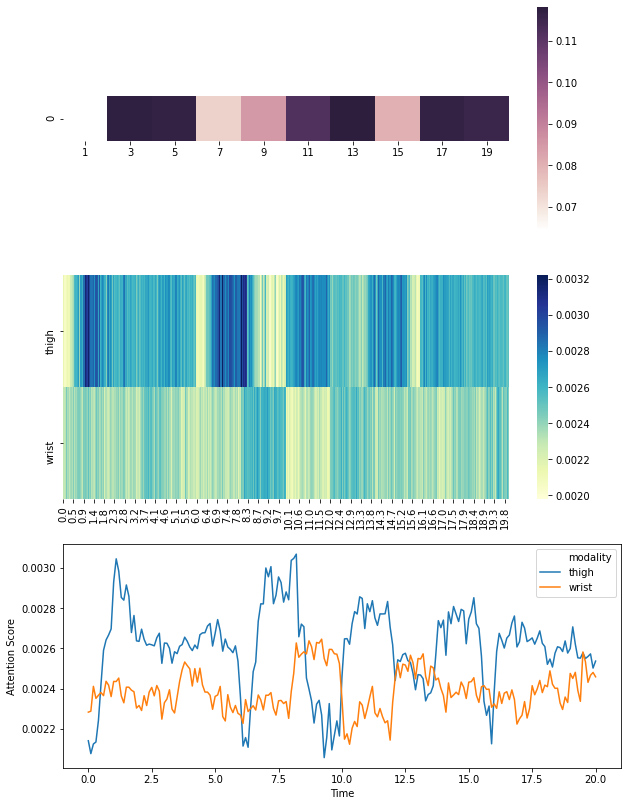

81
True Label: Superman
Predicted: Superman


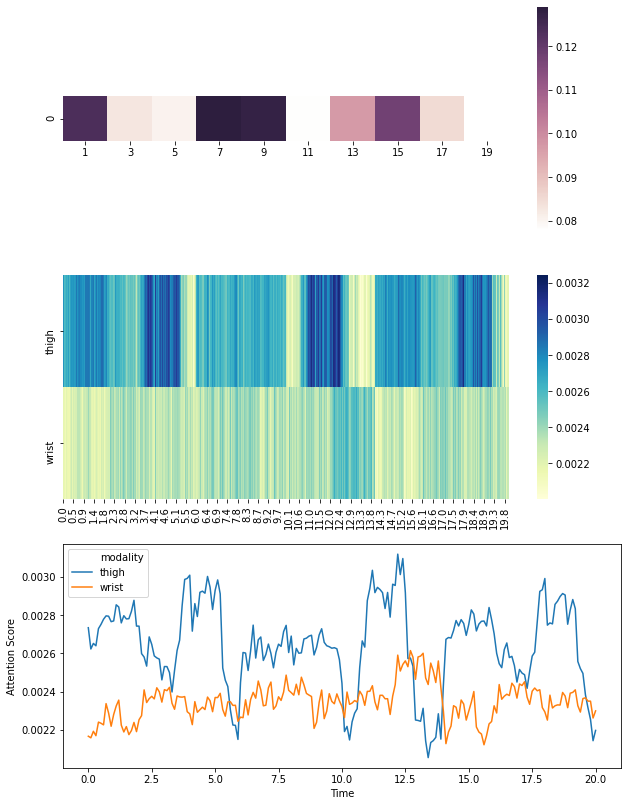

82
True Label: Superman
Predicted: Superman


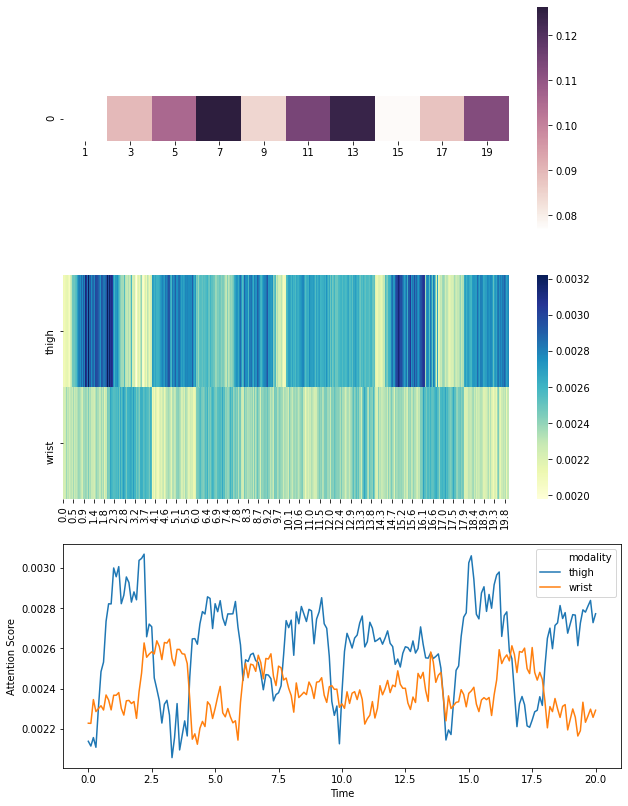

83
True Label: Superman
Predicted: Superman


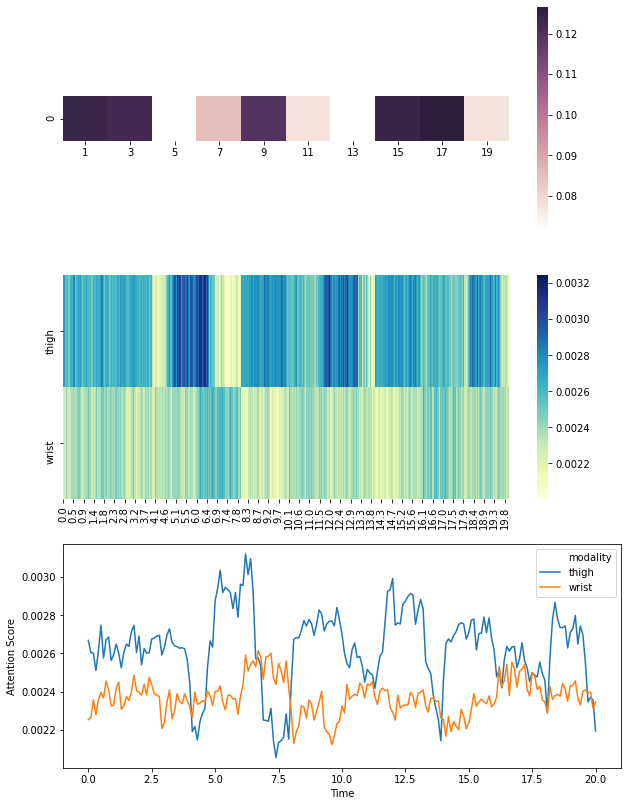

84
True Label: Superman
Predicted: Superman


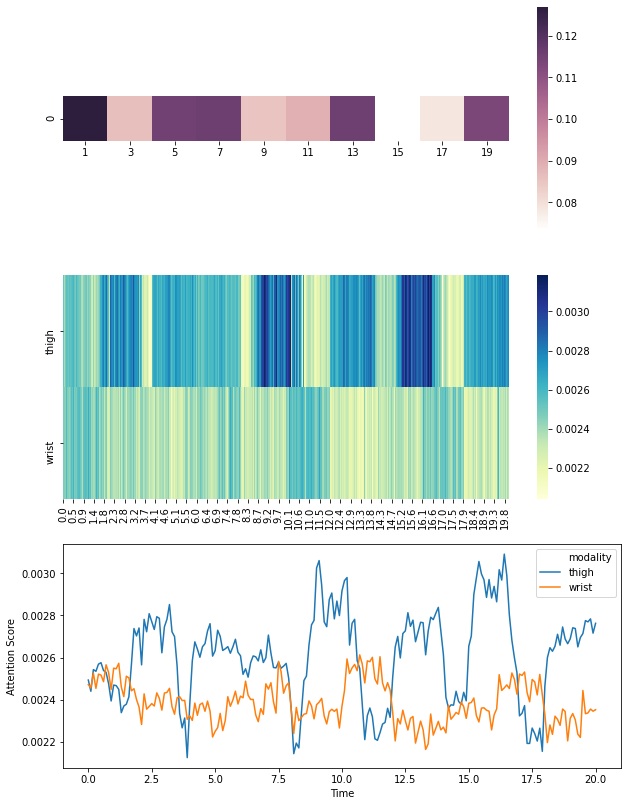

85
True Label: Superman
Predicted: Superman


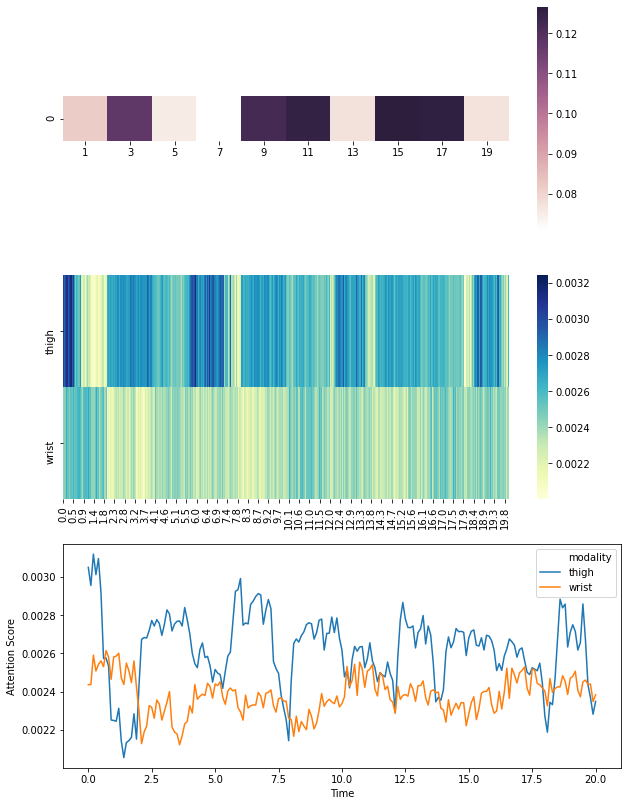

86
True Label: Superman
Predicted: Superman


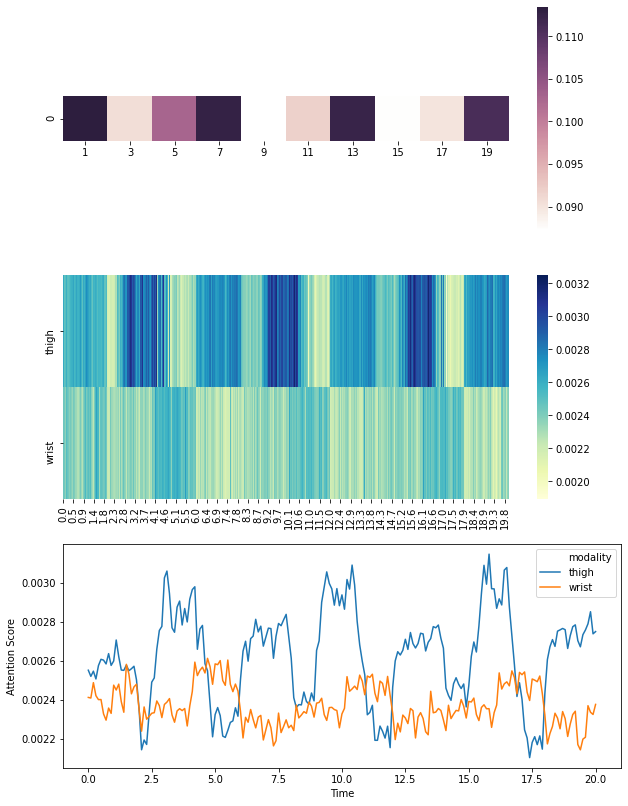

87
True Label: Superman
Predicted: Superman


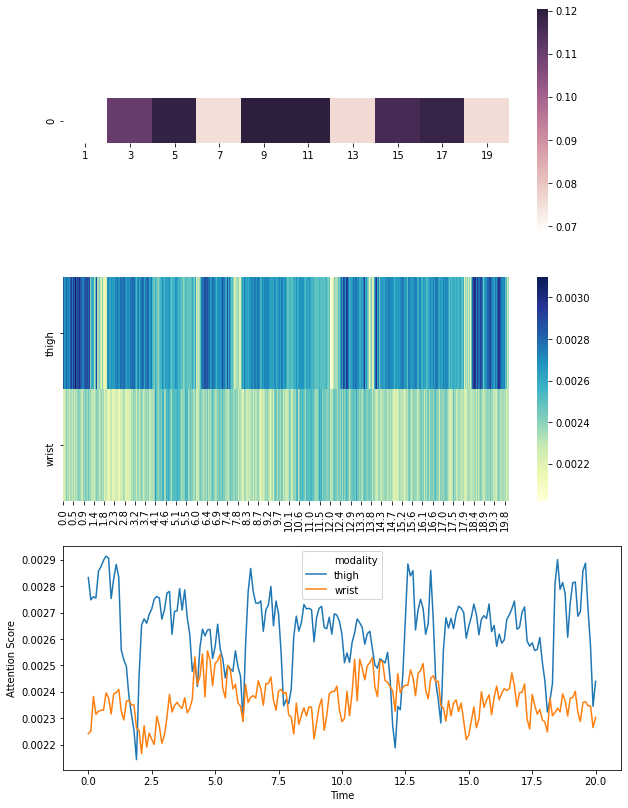

88
True Label: Superman
Predicted: Superman


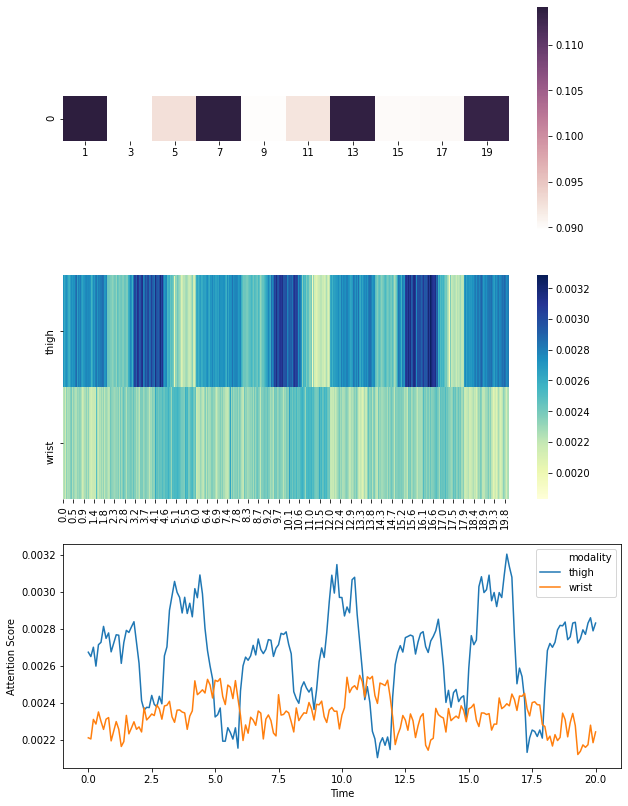

89
True Label: Superman
Predicted: Superman


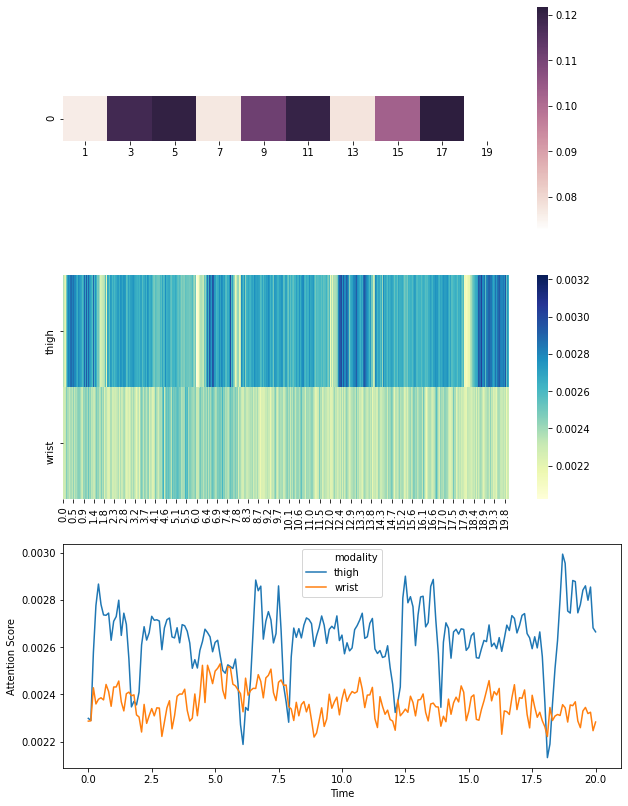

90
True Label: Superman
Predicted: Superman


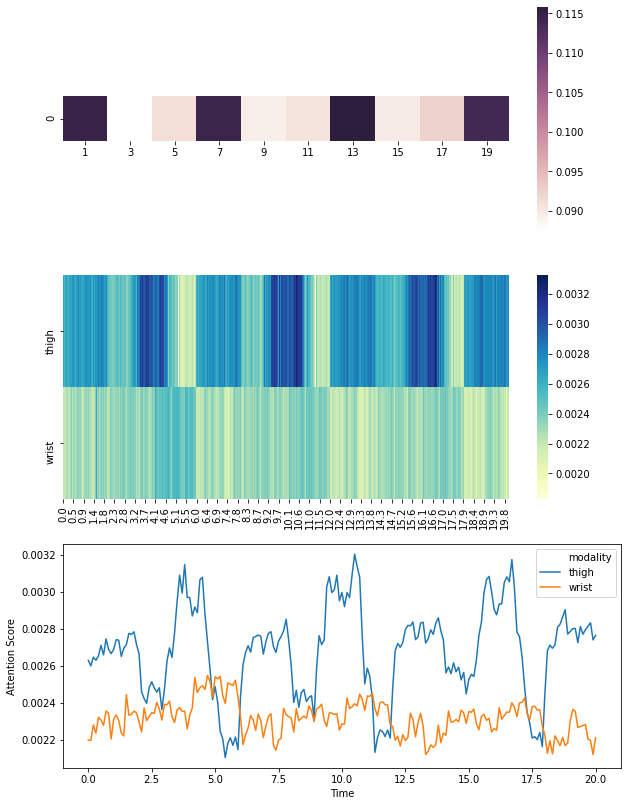

91
True Label: Superman
Predicted: Superman


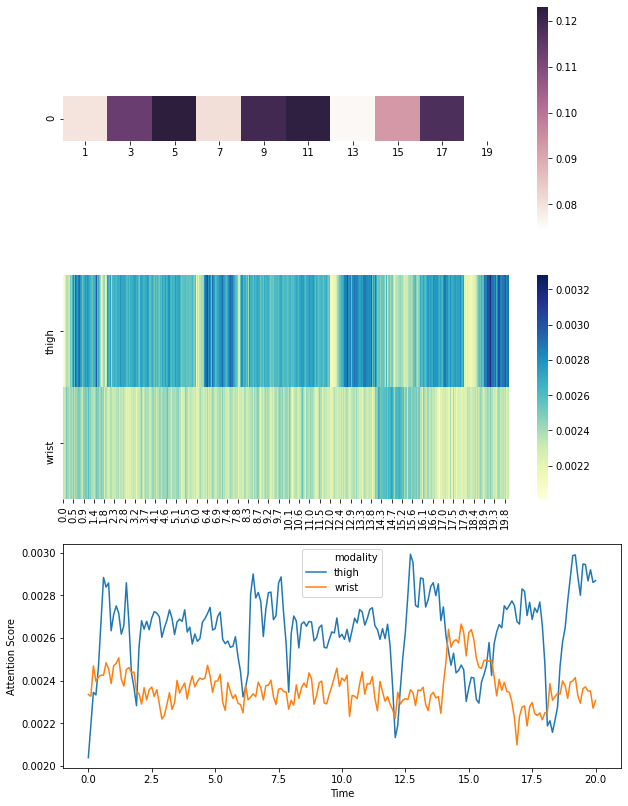

92
True Label: Superman
Predicted: Superman


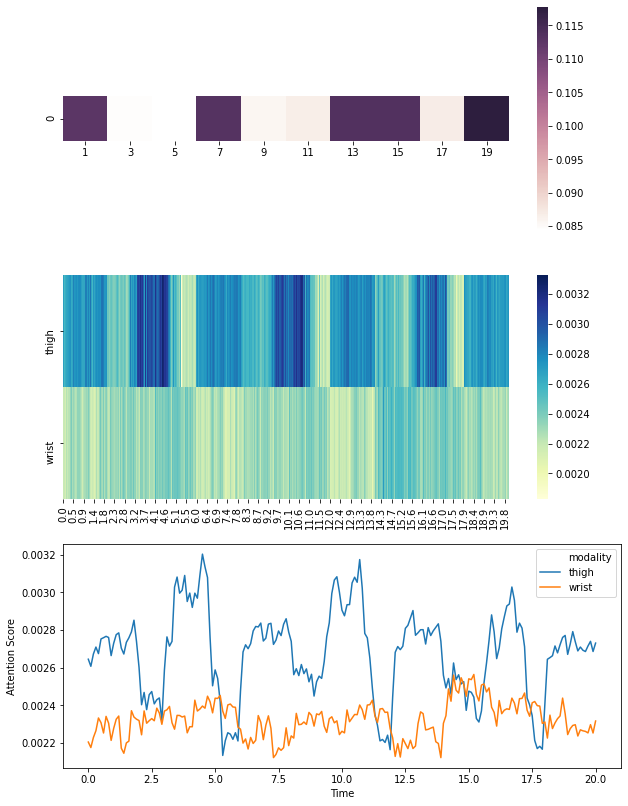

93
True Label: Superman
Predicted: Superman


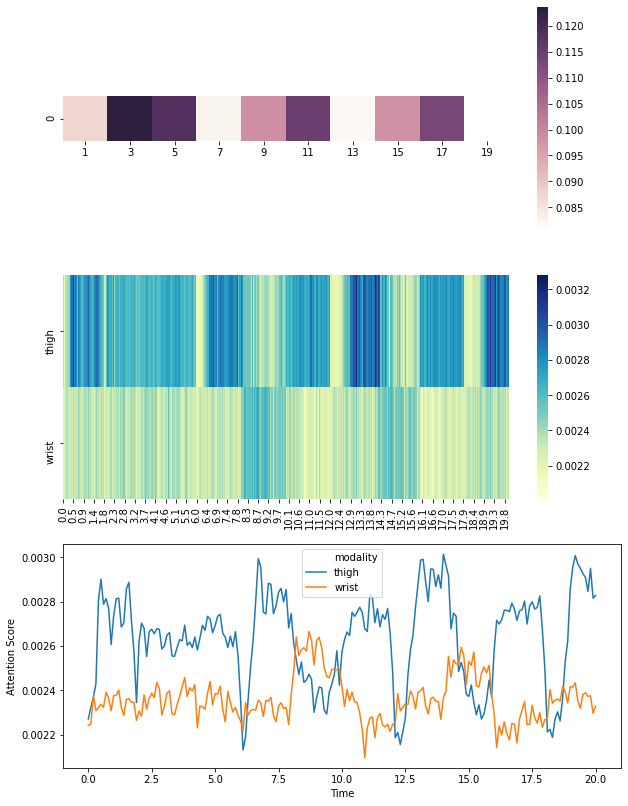

94
True Label: Knee Rolling
Predicted: Knee Rolling


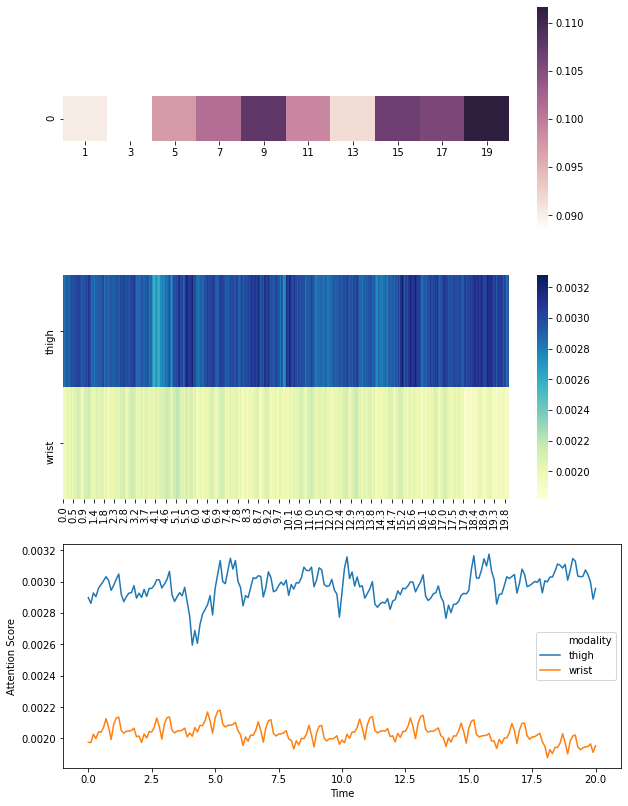

In [ ]:
for i in range(80, 95, 1):
    show_attention_map(i)

True Label: Repeated Extension in Lying
Predicted: Repeated Extension in Lying


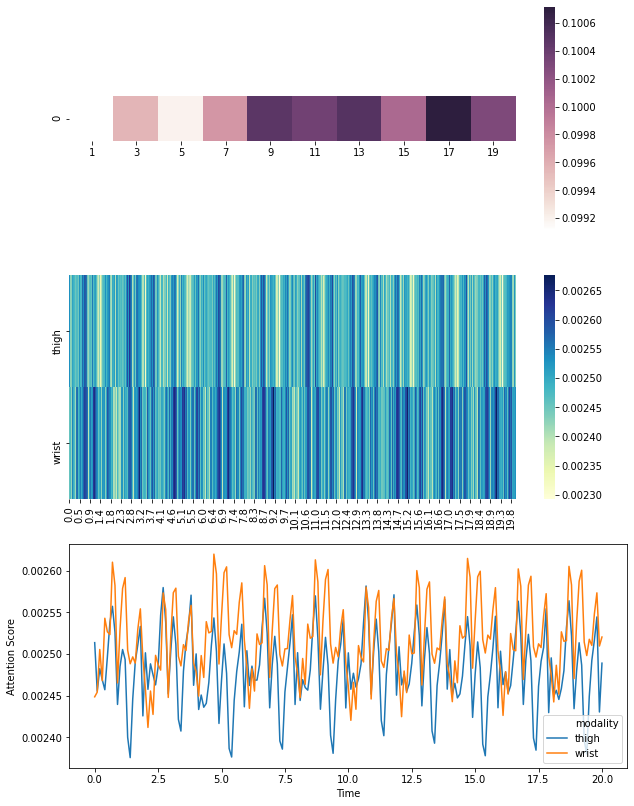

True Label: Pelvic tilt
Predicted: Pelvic tilt


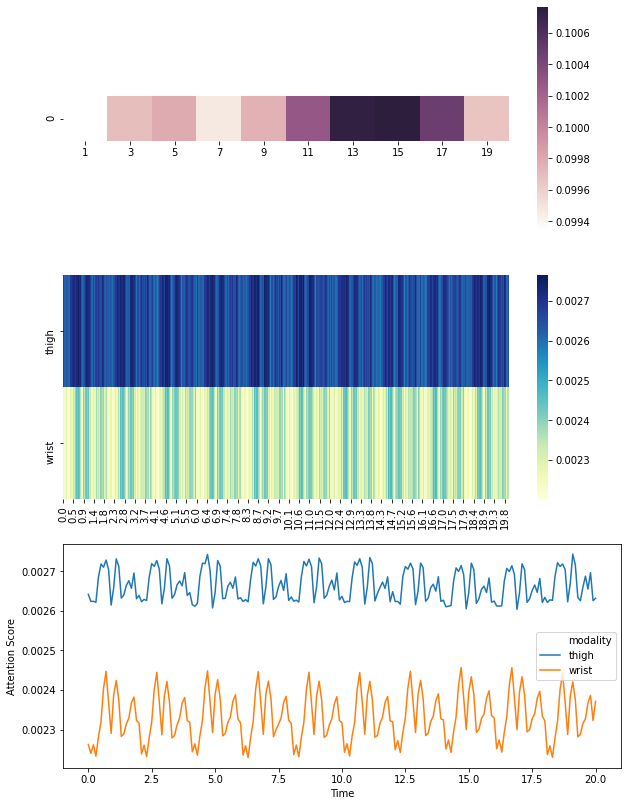

True Label: Knee Rolling
Predicted: Knee Rolling


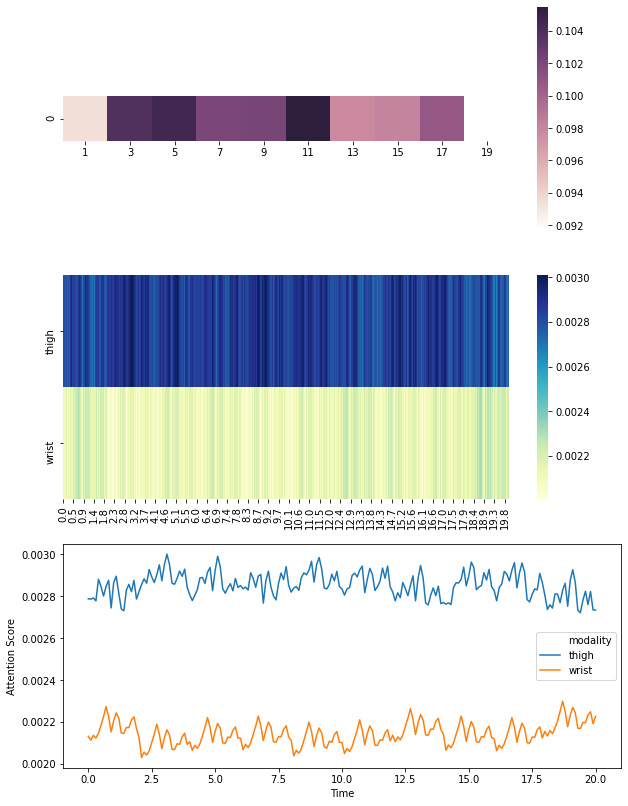

In [ ]:
for i in range(250, 450, 70):
    show_attention_map(i)

## Opportunity

Benchmark Subject

In [6]:
opp_window_attn = np.load('../data/attn-maps/opp_benm_window.npy')
opp_session_attn = np.load('../data/attn-maps/opp_benm_session.npy')
opp_labels = np.load('../data/attn-maps/opp_benm_labels.npy')
opp_preds = np.load('../data/attn-maps/opp_benm_preds.npy')
opp_mid_level = np.load('../data/attn-maps/opp_benm_mid_l.npy')
opp_locomotion = np.load('../data/attn-maps/opp_benm_loco_l.npy')

In [7]:
opp_session_attn.shape

(561, 1, 36)

In [8]:
opp_window_attn.shape

(561, 252, 25)

In [9]:
activity_map_opp = {0:'Other',1:'Relaxing',2:'Coffee time', 3:'Early morning',
                    4:'Cleanup',5:'Sandwich time'}
mid_activity_opp = ['Other', 'Open Door 1', 'Open Door 2', 'Close Door 1',
                    'Close Door 2', 'Open Fridge', 'Close Fridge', 
                    'Open Dishwasher', 'Close Dishwasher', 'Open Drawer 1', 
                    'Close Drawer 1', 'Open Drawer 2', 'Close Drawer 2', 
                    'Open Drawer 3', 'Close Drawer 3', 'Clean Table', 
                    'Drink from Cup', 'Toggle Switch']
locomotion_activity_opp = ['Other', 'Stand', 'Walk', 'Sit', 'Lie']

In [ ]:
# def show_attention_heatmap_opp(idx, heatmap=True, logscale=False):
#     print(f'True Label     : {activity_map_opp[opp_labels[idx]]}')
#     print(f'Predicted Label: {activity_map_opp[opp_preds[idx]]}')
#     fig, ax = plt.subplots(2,1, figsize = (10,8))

#     ## session heatmap
#     cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#     sns.heatmap(pd.DataFrame(opp_session_attn[idx], columns=np.around(np.linspace(0,30,36), 1)), cmap=cmap, square=True, ax=ax[0])

#     w_attn_df = pd.DataFrame({
#                         'BACK':opp_window_attn[idx, 0::7, :].flatten(),
#                         'RUA':opp_window_attn[idx, 1::7, :].flatten(),
#                         'RLA':opp_window_attn[idx, 2::7, :].flatten(),
#                         'LUA':opp_window_attn[idx, 3::7, :].flatten(),
#                         'LLA':opp_window_attn[idx, 4::7, :].flatten(),
#                         'L-SHOE':opp_window_attn[idx, 5::7, :].flatten(),
#                         'R-SHOE':opp_window_attn[idx, 6::7, :].flatten()},
#                         index=np.around(np.linspace(0,30,900),1)
#                         )
#     sns.heatmap(w_attn_df.T, cmap='YlGnBu', ax=ax[1])
#     plt.show()

In [ ]:
# def show_attention_map_opp(idx, logscale=False):
#     # print(f'True Label     : {activity_map_opp[opp_labels[idx]]}')
#     # print(f'Predicted Label: {activity_map_opp[opp_preds[idx]]}')
#     # fig, ax = plt.subplots(2,1, figsize = (10,8))

#     ## session heatmap
#     # cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#     # sns.heatmap(pd.DataFrame(opp_session_attn[idx], columns=np.around(np.linspace(0,30,36), 1)), cmap=cmap, square=True, ax=ax[0])

#     w_attn_df = pd.DataFrame({'Time':np.linspace(0,30, num=25*36),
#                         'BACK':opp_window_attn[idx, 0::7, :].flatten(),
#                         'RUA':opp_window_attn[idx, 1::7, :].flatten(),
#                         'RLA':opp_window_attn[idx, 2::7, :].flatten(),
#                         'LUA':opp_window_attn[idx, 3::7, :].flatten(),
#                         'LLA':opp_window_attn[idx, 4::7, :].flatten(),
#                         'L-SHOE':opp_window_attn[idx, 5::7, :].flatten(),
#                         'R-SHOE':opp_window_attn[idx, 6::7, :].flatten()}
#                         )
#     w_attn_df = pd.melt(w_attn_df, 'Time', value_vars=['BACK', 'RUA', 'RLA', 'LUA', 'LLA', 'L-SHOE', 'R-SHOE'], value_name='Attention Score', var_name='modality')
#     plt.figure(figsize = (8,5))
#     sns.lineplot(x='Time', y='Attention Score', hue='modality', data=w_attn_df, ci=None)
#     if logscale:
#         ax[1].set(yscale="log")
#     plt.show()
#     print('*'*100, '\n')

In [85]:
def plot_as_subplots(idx):
#     print(f'True Label     : {activity_map_opp[opp_labels[idx]]}')
#     print(f'Predicted Label: {activity_map_opp[opp_preds[idx]+1]}')
    
    plt.rcParams.update({'font.size': 12})

    f,[ax_loco, ax_mid, ax_window, ax_heat]=plt.subplots(nrows=4,figsize=(10, 11.5),sharex=True, gridspec_kw={'height_ratios': [.6, .8, 1.2, .5]})

    # session heatmap
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    sns.heatmap(pd.DataFrame(opp_session_attn[idx],
                             columns=np.around(np.linspace(0,30,36), 1)),
                 cmap=cmap, square=True, cbar=False,
                robust=False, ax=ax_heat)
    ax_heat.xaxis.set_tick_params(labelbottom=True)
    ax_heat.get_yaxis().set_visible(False)

    attn_df = pd.DataFrame({'mid_label':opp_mid_level[idx],
                    'loco_label':opp_locomotion[idx],
                    'time':np.linspace(0,36, num=25*36)})
    prev_midlabel = None
    prev_locolabel = None
    mid_line_sequence = []
    loco_line_sequence = []
    mid_label_list = []
    loco_label_list = []
    for i, row in attn_df.iterrows():
        current_midlabel = row['mid_label']
        if current_midlabel != prev_midlabel:
            prev_midlabel = current_midlabel
            mid_line_sequence.append(row['time'])
            mid_label_list.append(current_midlabel)

        current_locolabel = row['loco_label']
        if current_locolabel != prev_locolabel:
            prev_locolabel = current_locolabel
            loco_line_sequence.append(row['time'])
            loco_label_list.append(current_locolabel)
    loco_line_sequence.append(36.0)
    loco_label_list.append(prev_locolabel)
    mid_line_sequence.append(36.0)
    mid_label_list.append(prev_midlabel)

    mid_level_colors = {0:'red', 1:'limegreen', 2:'lime',3:'lightcoral',4:'indianred',5:'slateblue',6:'darkslateblue',7:'orange',8:'darkorange', 9:'teal',10:'cyan',11:'hotpink',12:'fuchsia', 13:'firebrick', 14:'maroon', 15:'royalblue', 16:'navy', 17:'purple'}
    locomotion_colors = {0:'red', 1:'yellow', 2:'green', 3:'blue', 4:'purple'}

    for i in range(len(loco_line_sequence)-1):
        color = locomotion_colors[int(loco_label_list[i])]
        ax_loco.hlines(0.1, loco_line_sequence[i], loco_line_sequence[i+1], colors=color, lw=5)
        ax_loco.text((loco_line_sequence[i]+loco_line_sequence[i+1])/2, 0.11, locomotion_activity_opp[int(loco_label_list[i])], ha='center', rotation=90)
    ax_loco.set_ylim(bottom=0.09, top=0.15)
    ax_loco.set_xlabel('Locomotion')
    # ax_loco.get_yaxis().set_visible(False)
    ax_loco.axis('off')
    
    for i in range(len(mid_line_sequence)-1):
        color = mid_level_colors[int(mid_label_list[i])]
        ax_mid.hlines(0.1, mid_line_sequence[i], mid_line_sequence[i+1], colors=color, lw=5)
        ax_mid.text((mid_line_sequence[i] + mid_line_sequence[i+1])/2, 0.11, mid_activity_opp[int(mid_label_list[i])], ha='center', rotation=90)
    ax_mid.set_ylim(bottom=0.09, top=0.17)
    ax_mid.set_xlabel('Mid Level Gesture')
    # ax_heat.xaxis.set_ticks(np.arange(0,30,36))
    # plt.locator_params(nbins=10)
    ax_mid.axis('off')
    for label in plt.gca().xaxis.get_ticklabels()[::2]:
        label.set_visible(False)

    # plt.show()
    w_attn_df = pd.DataFrame({
                        'BACK':opp_window_attn[idx, 0::7, :].flatten(),
                        'RUA':opp_window_attn[idx, 1::7, :].flatten(),
                        'RLA':opp_window_attn[idx, 2::7, :].flatten(),
                        'LUA':opp_window_attn[idx, 3::7, :].flatten(),
                        'LLA':opp_window_attn[idx, 4::7, :].flatten(),
                        'L-SHOE':opp_window_attn[idx, 5::7, :].flatten(),
                        'R-SHOE':opp_window_attn[idx, 6::7, :].flatten()},
                        index=np.around(np.linspace(0,30,900),1)
                        )
    sns.heatmap(w_attn_df.rolling(25).mean().iloc[25-1::25].T, square=False, cmap=sns.cubehelix_palette(rot=-.3), cbar=False, ax=ax_window)
    plt.subplots_adjust(wspace=0, hspace=0)
#     plt.savefig(f'result/attn/opp_attnmap-{idx}_{activity_map_opp[opp_labels[idx]]}_{activity_map_opp[opp_preds[idx]+1]}.jpg', dpi=200, quality=95, bbox_inches = 'tight', pad_inches = 0)
#     plt.close(f)
#     plt.ioff()
    plt.show()

0


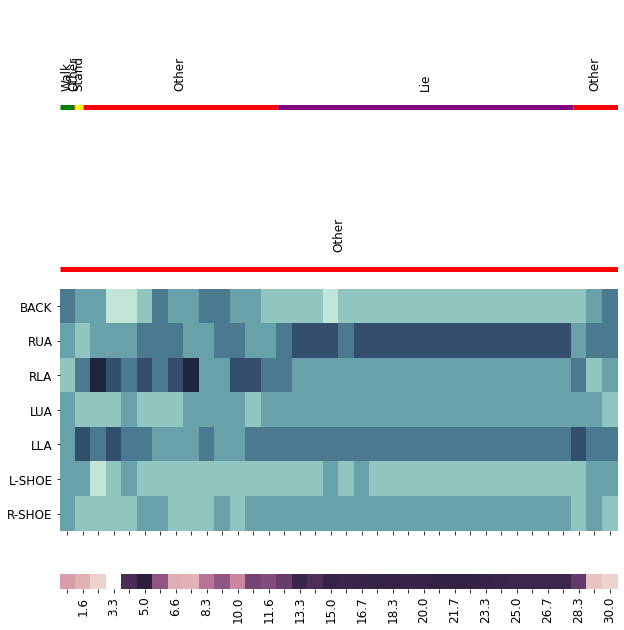

100


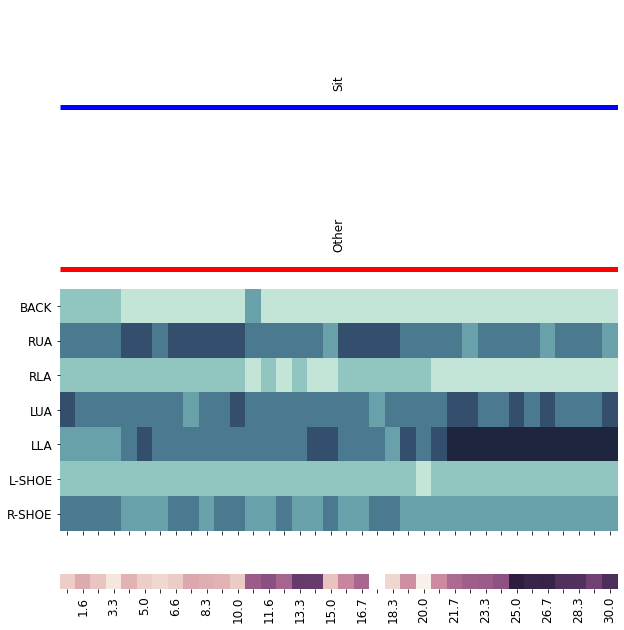

200


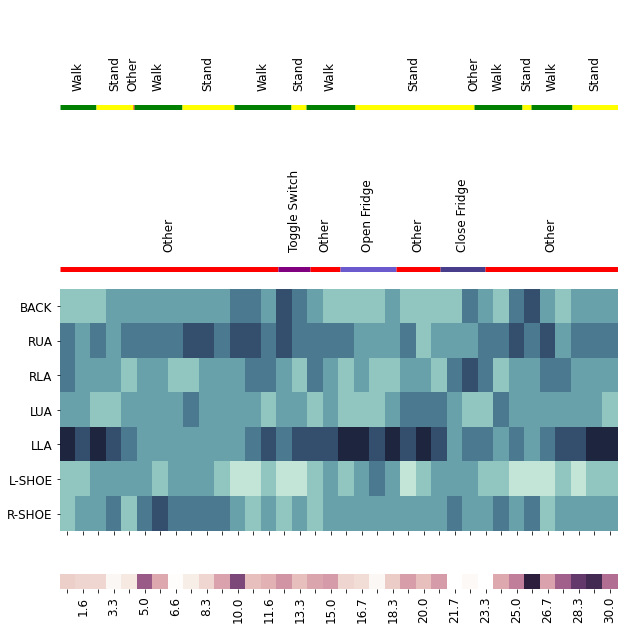

300


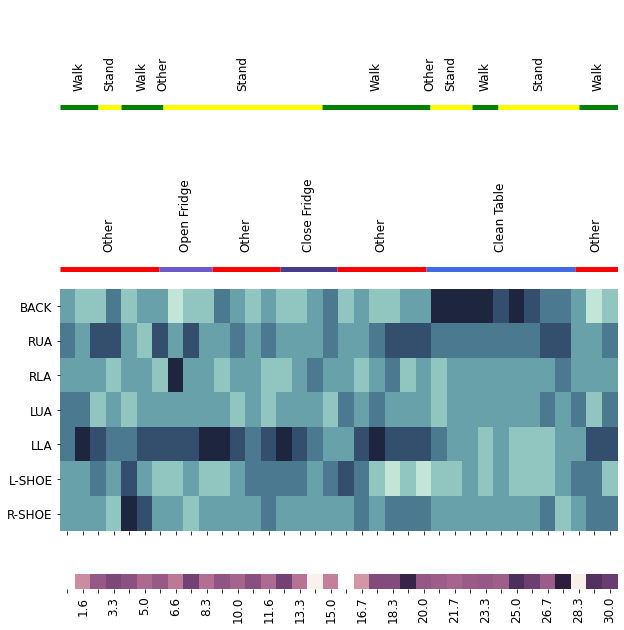

400


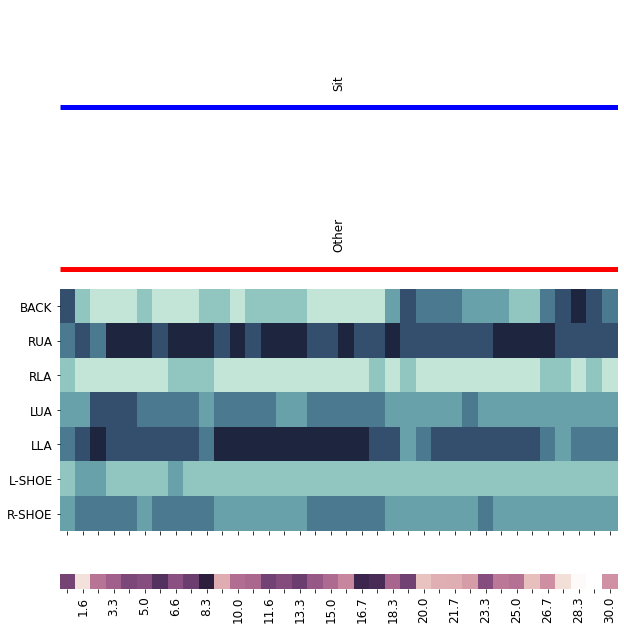

500


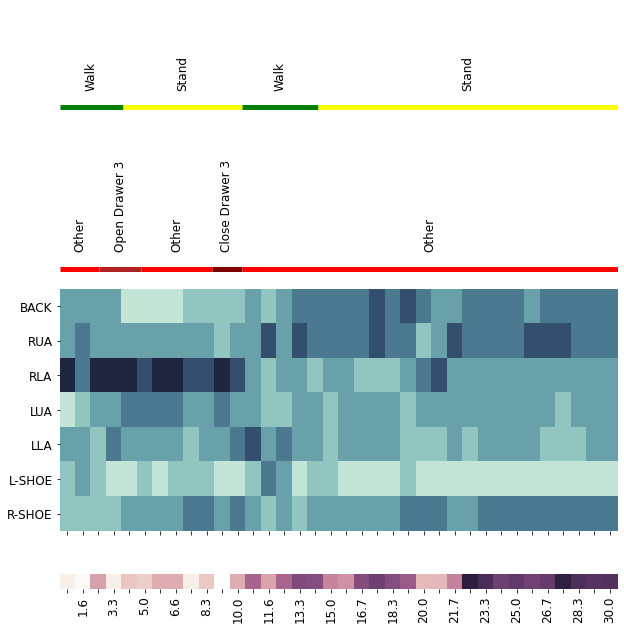

In [86]:
for i in range(0,561, 100):
    print(i)
    plot_as_subplots(i)
#     # show_attention_heatmap_opp(i)
#     # plot_opp_midlevel(i)
#     # plot_opp_locomotion(i)
#     # show_attention_map_opp(i)
# plot_as_subplots(308)

## Opp fresh

In [ ]:
opp_window_attn = np.load('/content/opp_benm_window.npy')
opp_session_attn = np.load('/content/opp_benm_session.npy')
opp_labels = np.load('/content/opp_benm_labels.npy')
opp_preds = np.load('/content/opp_benm_preds.npy')
opp_mid_level = np.load('/content/opp_benm_mid_l.npy')
opp_locomotion = np.load('/content/opp_benm_loco_l.npy')
opp_test_data = np.load('/content/opp_benm_test_features (1).npy')

In [ ]:
opp_test_data.shape

(561, 900, 77)

In [ ]:
sensor_list = []
for x in ['BACK', 'RUA', 'RLA', 'LUA', 'LLA']:
    sensor_list.extend([f'{x}_acc_x', f'{x}_acc_y', f'{x}_acc_z', f'{x}_gyro_x', f'{x}_gyro_y', f'{x}_gyro_z', f'{x}_mag_x', f'{x}_mag_y', f'{x}_mag_z'])

In [ ]:
for x in ['L-SHOE', 'R-SHOE']:
    for y in ['Eu', 'Nav_A', 'Body_A', 'AngVelBodyFrame', 'AngVelNavFrame']:
        sensor_list.extend([f'{x}_{y}_x', f'{x}_{y}_y', f'{x}_{y}_z'])
    sensor_list.extend([f'{x}_compass'])

In [ ]:
len(sensor_list)

77

In [ ]:
opp_df = pd.DataFrame(opp_test_data[490], columns=sensor_list)

In [ ]:
sensor_list_xyz = sensor_list.copy()

In [ ]:
sensor_list_xyz.remove('L-SHOE_compass')
sensor_list_xyz.remove('R-SHOE_compass')

In [ ]:
sensor_list_xyz

['BACK_acc_x',
 'BACK_acc_y',
 'BACK_acc_z',
 'BACK_gyro_x',
 'BACK_gyro_y',
 'BACK_gyro_z',
 'BACK_mag_x',
 'BACK_mag_y',
 'BACK_mag_z',
 'RUA_acc_x',
 'RUA_acc_y',
 'RUA_acc_z',
 'RUA_gyro_x',
 'RUA_gyro_y',
 'RUA_gyro_z',
 'RUA_mag_x',
 'RUA_mag_y',
 'RUA_mag_z',
 'RLA_acc_x',
 'RLA_acc_y',
 'RLA_acc_z',
 'RLA_gyro_x',
 'RLA_gyro_y',
 'RLA_gyro_z',
 'RLA_mag_x',
 'RLA_mag_y',
 'RLA_mag_z',
 'LUA_acc_x',
 'LUA_acc_y',
 'LUA_acc_z',
 'LUA_gyro_x',
 'LUA_gyro_y',
 'LUA_gyro_z',
 'LUA_mag_x',
 'LUA_mag_y',
 'LUA_mag_z',
 'LLA_acc_x',
 'LLA_acc_y',
 'LLA_acc_z',
 'LLA_gyro_x',
 'LLA_gyro_y',
 'LLA_gyro_z',
 'LLA_mag_x',
 'LLA_mag_y',
 'LLA_mag_z',
 'L-SHOE_Eu_x',
 'L-SHOE_Eu_y',
 'L-SHOE_Eu_z',
 'L-SHOE_Nav_A_x',
 'L-SHOE_Nav_A_y',
 'L-SHOE_Nav_A_z',
 'L-SHOE_Body_A_x',
 'L-SHOE_Body_A_y',
 'L-SHOE_Body_A_z',
 'L-SHOE_AngVelBodyFrame_x',
 'L-SHOE_AngVelBodyFrame_y',
 'L-SHOE_AngVelBodyFrame_z',
 'L-SHOE_AngVelNavFrame_x',
 'L-SHOE_AngVelNavFrame_y',
 'L-SHOE_AngVelNavFrame_z',
 'R-SHOE_E

In [ ]:
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [ ]:
new_df = pd.DataFrame()
for cols in grouper(sensor_list_xyz, 3):
    new_df[cols[0][:-2]] = opp_df[list(cols)].pow(2).sum(axis=1)
new_df

,BACK_acc,BACK_gyro,BACK_mag,RUA_acc,RUA_gyro,RUA_mag,RLA_acc,RLA_gyro,RLA_mag,LUA_acc,LUA_gyro,LUA_mag,LLA_acc,LLA_gyro,LLA_mag,L-SHOE_Eu,L-SHOE_Nav_A,L-SHOE_Body_A,L-SHOE_AngVelBodyFrame,L-SHOE_AngVelNavFrame,R-SHOE_Eu,R-SHOE_Nav_A,R-SHOE_Body_A,R-SHOE_AngVelBodyFrame,R-SHOE_AngVelNavFrame
0,1018342.0,235761.0,446099.0,897222.0,345089.0,521939.0,874789.0,1119177.0,547569.0,1178210.0,111206.0,466881.0,1134770.0,440195.0,527685.0,27898.0,5022.0,1042790.0,14669.0,14669.0,9338.0,344532.0,777182.0,11063954.0,11063954.0
1,1015406.0,294069.0,445161.0,927770.0,534221.0,526787.0,951442.0,1517405.0,554393.0,1136350.0,277077.0,468266.0,1093779.0,304538.0,529349.0,27898.0,3693.0,1043610.0,8643.0,8643.0,7289.0,143369.0,751386.0,7884854.0,7884854.0
2,1021313.0,441226.0,447416.0,965173.0,687438.0,529645.0,1027826.0,1844482.0,566450.0,1096821.0,509606.0,470761.0,1069694.0,139630.0,532235.0,27898.0,3933.0,1030033.0,3099.0,3099.0,6459.0,105702.0,863222.0,6771131.0,6771131.0
3,1018997.0,564098.0,445210.0,1021860.0,711117.0,528584.0,1082170.0,2027555.0,579834.0,1042574.0,621161.0,464217.0,1038804.0,78750.0,524004.0,27898.0,3242.0,1020488.0,3209.0,3209.0,6293.0,24426.0,1036064.0,5325659.0,5325659.0
4,1022669.0,617469.0,448251.0,1055277.0,754285.0,529401.0,1167141.0,2109650.0,593358.0,1012941.0,722075.0,464658.0,1007454.0,252185.0,523369.0,27898.0,1412.0,1034232.0,13934.0,13934.0,5965.0,20243.0,1257723.0,5228838.0,5228838.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,998875.0,4340.0,419124.0,984974.0,3884.0,467045.0,982348.0,2525.0,583986.0,1009122.0,21686.0,495746.0,1013689.0,17921.0,554259.0,5010.0,358.0,1034185.0,138.0,138.0,13953.0,6313.0,847062.0,2163.0,2163.0
896,998796.0,10961.0,423140.0,988714.0,7850.0,471994.0,995285.0,4014.0,587986.0,1013171.0,28520.0,501179.0,1026306.0,15497.0,553730.0,5010.0,432.0,1040534.0,602.0,602.0,13953.0,5441.0,862154.0,1098.0,1098.0
897,1002603.0,8942.0,420340.0,1006452.0,8996.0,472702.0,1008065.0,18539.0,586829.0,1021373.0,14606.0,497638.0,1026971.0,17444.0,552082.0,5010.0,374.0,1036661.0,566.0,566.0,13953.0,11925.0,797141.0,2595.0,2595.0
898,1003229.0,9954.0,420340.0,1006570.0,10996.0,468419.0,1012666.0,10094.0,586637.0,1008021.0,15901.0,494739.0,1011556.0,21042.0,550581.0,5010.0,661.0,1048246.0,1444.0,1444.0,13953.0,11956.0,797141.0,2489.0,2489.0


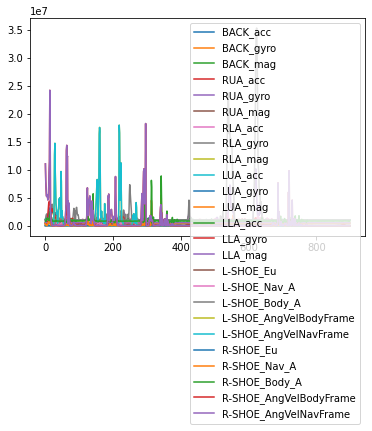

In [ ]:
new_df.plot()

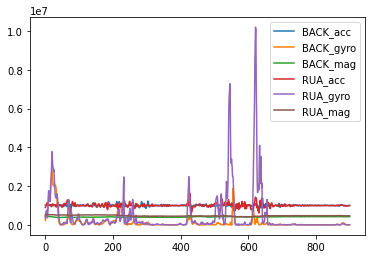

In [ ]:
new_df[['BACK_acc', 'BACK_gyro', 'BACK_mag', 'RUA_acc', 'RUA_gyro', 'RUA_mag']].plot()

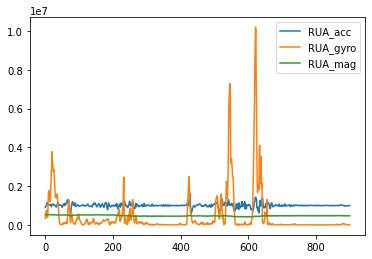

In [ ]:
new_df[['RUA_acc', 'RUA_gyro', 'RUA_mag']].plot()

In [ ]:
opp_window_attn.shape

(561, 252, 25)

In [ ]:
idx = 55

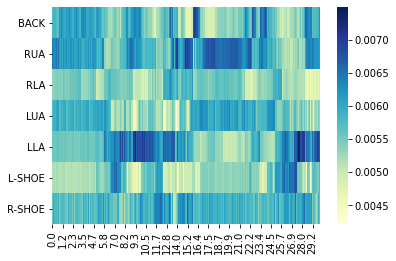

In [ ]:
    w_attn_df = pd.DataFrame({
                        'BACK':opp_window_attn[idx, 0::7, :].flatten(),
                        'RUA':opp_window_attn[idx, 1::7, :].flatten(),
                        'RLA':opp_window_attn[idx, 2::7, :].flatten(),
                        'LUA':opp_window_attn[idx, 3::7, :].flatten(),
                        'LLA':opp_window_attn[idx, 4::7, :].flatten(),
                        'L-SHOE':opp_window_attn[idx, 5::7, :].flatten(),
                        'R-SHOE':opp_window_attn[idx, 6::7, :].flatten()},
                        index=np.around(np.linspace(0,30,900),1)
                        )
    sns.heatmap(w_attn_df.T, cmap='YlGnBu')
    plt.show()

In [ ]:
w_attn_df.shape

(900, 7)

In [ ]:
900/25

36.0

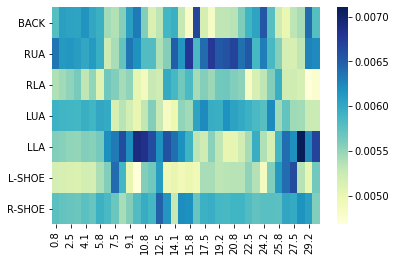

In [ ]:
ll = []
for idx, row in w_attn_df.iterrows():
    highest = np.argsort(row.values)[::-1][:2]
    ll.append([x in highest for x in range(7)])

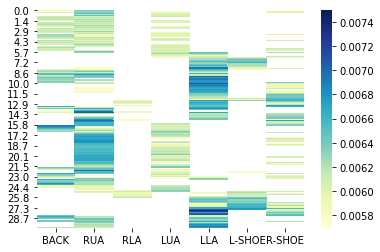

In [ ]:
sns.heatmap(w_attn_df, mask=np.invert(np.asarray(ll)),  cmap='YlGnBu')